<a href="https://colab.research.google.com/github/imceballos/LogisticRegression/blob/master/Tarea_4_Israel_Ceballos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from operator import itemgetter
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

<h2>1) Construcción de la matriz de adjacencia</h2>

Para la construcción de la matriz representativa de la relaciones entre directores seguiremos los siguientes pasos:

a) Transformar el formato de la columna RUT a string <br>
b) Setear como indice la columna RUT <br>
c) Eliminar las filas que posean RUT = 0E (Extranjero) <br>
d) Agrupar en función de cada RUT los distintos directorios a cuales pertenece ese RUT, usando el método .apply(list) se agruparan en listas <br>
e) Mediante una doble iteración se generaran las filas del dataframe de adjacencia, usaremos la función intersection para encontrar el número de directorios comunes. <br>

En el presente analisis, eliminaremos todos aquellos directores con RUT <b>0E (Extranjero)<b>


In [ ]:
df = pd.read_excel('directores.xlsx')

In [ ]:
df.head()

,RUT,Nombre,Cargo,Fecha Nombramiento,Directorio
0,70563495,PABLO TURNER GONZÁLEZ,Presidente,2018-08-27,1
1,68617421,JAIME FERNANDO SANTA CRUZ NEGRI,Vicepresidente,2018-08-27,1
2,63702153,DIEGO VIDAL SANCHEZ,Director,2018-08-27,1
3,68334543,FRESIA MARGARITA HANCKES ESTEFAN,Director,2018-08-27,1
4,6861743K,JUAN PABLO SANTA CRUZ NEGRI,Director,2018-08-27,1


In [ ]:
df['RUT'] = df['RUT'].astype(str)

In [ ]:
df.set_index('RUT', inplace=True)

In [ ]:
names = df['Nombre'].to_dict()

<h5>Definición:</h5>

Usaremos la función intersection para encontrar el número de coincidencias entre los listas 
card(A&cap;B)


In [ ]:
def intersection(lst1, lst2): 
    return len(list(set(lst1) & set(lst2))) 

In [ ]:
df.drop(index='0E (Extranjero)', inplace=True)

In [ ]:
dict_of_rut = df.loc[:]['Directorio'].groupby('RUT').apply(list).to_dict()

In [ ]:
column = dict_of_rut.keys()

Iteración para definir cada una de las filas del dataframe, donde las entradas corresponderan al número de directorios que tengan en común dos RUT.

In [ ]:
all_rows = []
for j in dict_of_rut.keys():
    row = []
    for k in dict_of_rut.keys():
        row.append(intersection(dict_of_rut[j],dict_of_rut[k]))
    all_rows.append(row)

In [ ]:
len(all_rows)

1594

<h3>Dataset final: Matriz de adjacencia</h3>

In [ ]:
df_final = pd.DataFrame(data = all_rows, index = column, columns = column)

In [ ]:
df_final.shape

(1594, 1594)

<h2>2) Construcción del Grafo asociado</h2>
Para generar el grafo asociado a la matriz de adjacencia usaremos from_pandas_adjacency.


In [ ]:
G = nx.from_pandas_adjacency(df_final)

Información sobre el grafo

In [ ]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 1594\nNumber of edges: 8522\nAverage degree:  10.6926'

Para visualizar el grafo, configuramos el tamaño de la figura (<b>figsize</b>) y hacemos uso de <b>draw_networkx</b>

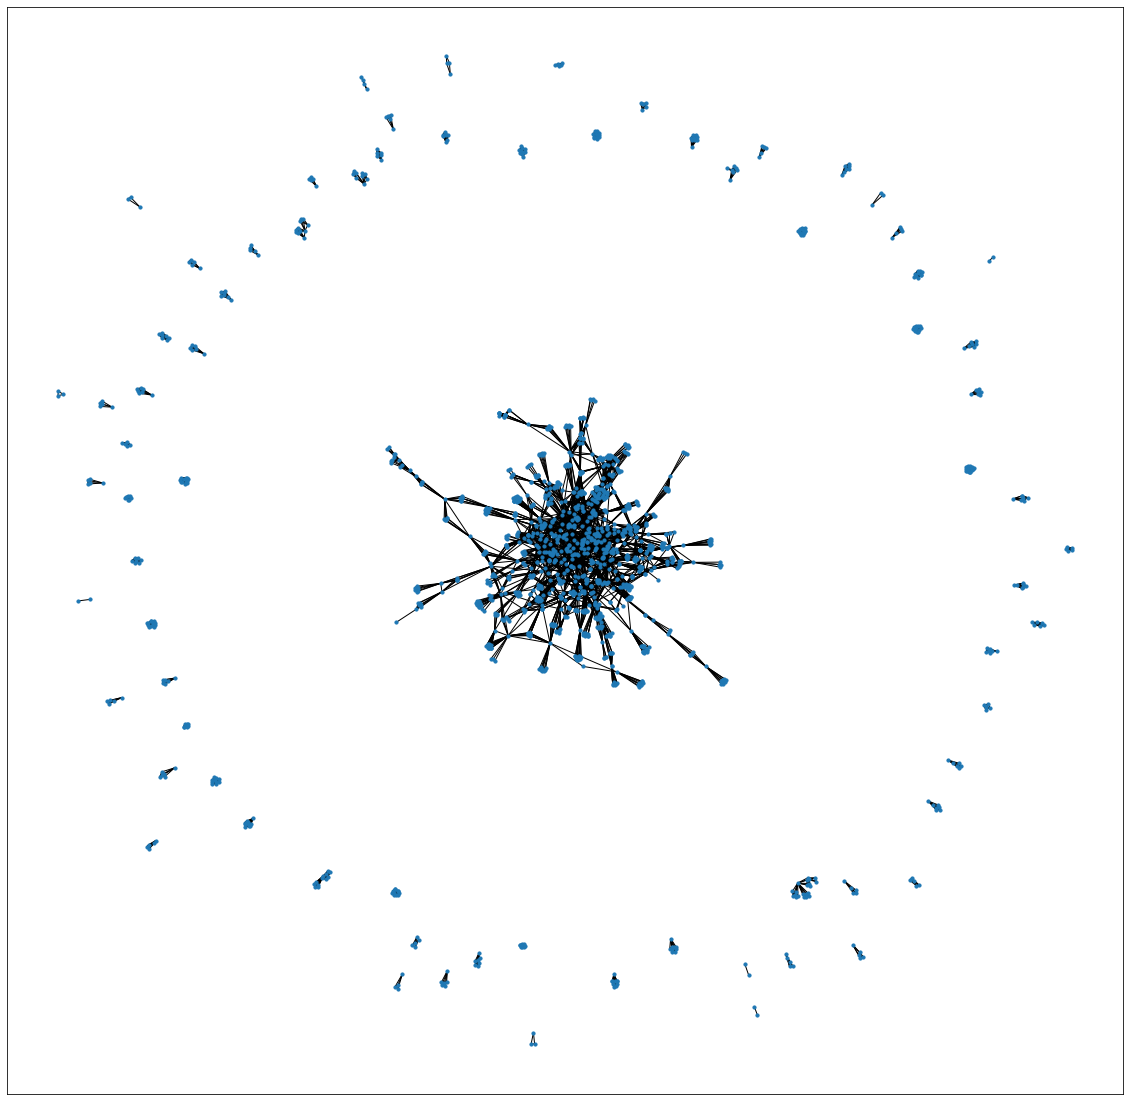

In [ ]:
sp = nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw_networkx(G,pos=sp, with_labels=False, node_size= 10)
plt.show()

<h2>3) Medidas de centralidad y Top 5</h2>

Dentro de las medidas habitualmente conocidas se encuentran <b>degree</b>, <b>betweenness centrality</b> y <b>eigenvector centrality</b>

Añadimos el atributo names a cada uno de los nodos creados 

In [ ]:
nx.set_node_attributes(G, names, 'name')

Añadimos el atributo <b>degree</b> como atributo a cada uno de los nodos creados 

In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

<h3>By degree</h3>
Ordenamos el dict con cada uno de los grados, para asi luego obtener el Top 5 de Directores según su grado

In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 5 Directores by degree:")
for d in sorted_degree[:5]:
    print(G._node[d[0]]['name'],G._node[d[0]]['degree'])

Top 5 Directores by degree:
HERMAN CHADWICK PIÑERA 43
CARLOS ALBERTO HELLER SOLARI 40
HERNAN ALBERTO BÜCHI BUC 37
LEONIDAS VIAL ECHEVERRÍA 37
MIGUEL IGNACIO GUERRERO GUTIERREZ 33


Obtenemos del grafo G dos atributos, el betweenness centrality y el eigenvector centrality. <br>
Luego asignaremos a cada nodo sus atributos correspondientes a su betweenness y eigenvector centrality

In [ ]:
betweenness_dict = nx.betweenness_centrality(G) 
eigenvector_dict = nx.eigenvector_centrality(G) 

nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

<h3>By betweenness</h3>
Ordenamos el dict con cada uno de los betweenness, para asi luego obtener el Top 5 de Directores según su betwenness centrality

In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 Directores by betweenness centrality:")
for d in sorted_betweenness[:5]:
    print(G._node[d[0]]['name'], G._node[d[0]]['betweenness'])

Top 5 Directores by betweenness centrality:
HERNAN ALBERTO BÜCHI BUC 0.060496182395394324
HERMAN CHADWICK PIÑERA 0.03471252394407416
CARLOS FRANCISCO CÁCERES CONTRERAS 0.03448894650230503
FRANCISCO GARDEWEG OSSA 0.03355856319852467
BALTAZAR SÁNCHEZ GUZMÁN 0.031310536469195877


<h3>By eigenvector</h3>
Ordenamos el dict con cada uno de los eigenvector, para asi luego obtener el Top 5 de Directores según su eigenvector centrality

In [ ]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 Directores by eigenvector centrality:")
for d in sorted_eigenvector[:5]:
    print((G._node[d[0]]['name']), (G._node[d[0]]['eigenvector']))

Top 5 Directores by eigenvector centrality:
RAMIRO MÉNDEZ URRUTIA 0.25065407216078167
PEDRO BARRÍA SCHULZ 0.23335895773610782
JORGE LEMBEYE ILLANES 0.23335895773610782
NICOLAS CORREA FERRER 0.23335895773610782
JUAN CARLOS BALMACEDA PEÑAFIEL 0.23335895773610782


<h2>4) Interpretación y visualizaciones</h2>

Para efectos de visualización, se utilizan dos recursos que logren gráficar la relación entre los directores.

Se usara Gephi para lograr tres visualizaciones de medidas de centralidad (grado, betweenness, eigenvector). Para lograr el analisis en Gephi se usara <b>.write_gexf</b> que guarda el Grafo en formato .gexf

In [ ]:
from networkx.readwrite import json_graph
import json

In [ ]:
nx.write_gexf(G, "graph_directores.gexf")

<h4>Grafo de directores (Grado)</h4>
Los puntos de mayor tamaño corresponden a los directores con mayor grado, recordemos que el Top 5 esta integrado por: <br>
-Herman Chadwick  43 <br>
-Carlos Heller 40 <br>
-Hernan Buchi 37 <br>
-Leonidad Vial 37 <br>
-Miguel Ignacio Guerrero 33 <br>


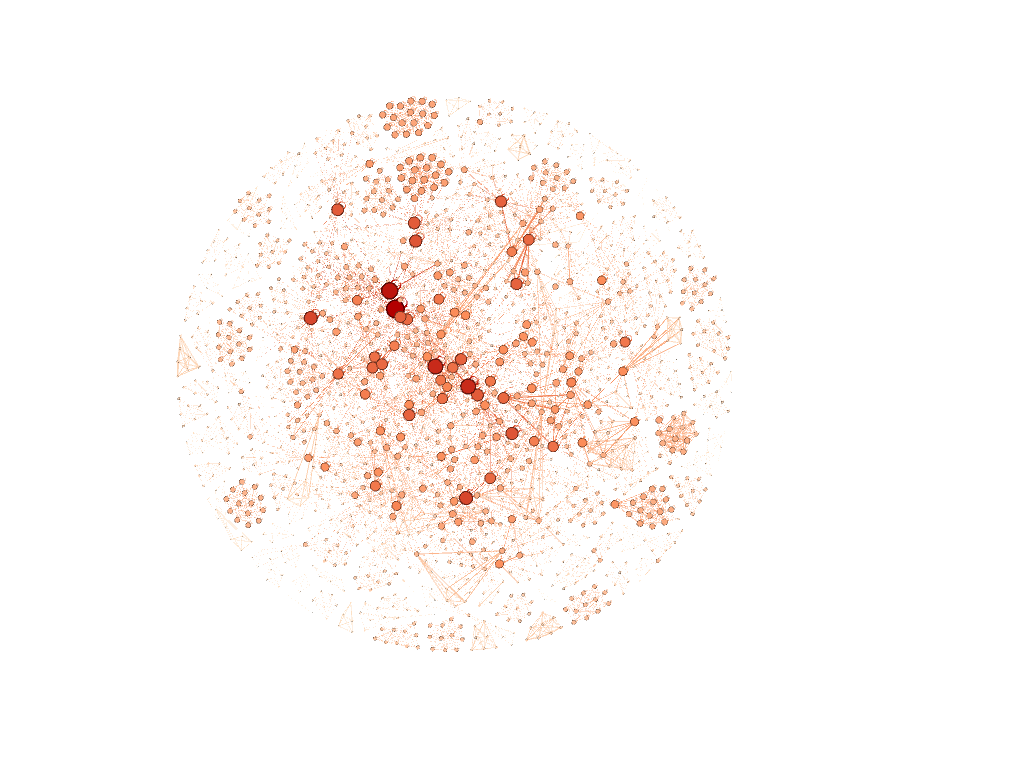

<h4>Grafo de directores (betweenness)</h4>
Los puntos de mayor tamaño corresponden a los directores con mayor betwenness, recordemos que el Top 5 esta integrado por: <br>
-Hernan Buchi 0.060496182395394324 <br>
-Herman Chadwick 0.03471252394407416 <br>
-Carlos Francisco Cáceres  0.03448894650230503 <br>
-Francisco Gardeweg 0.03355856319852467 <br>
-Baltazar Sánchez 0.031310536469195877


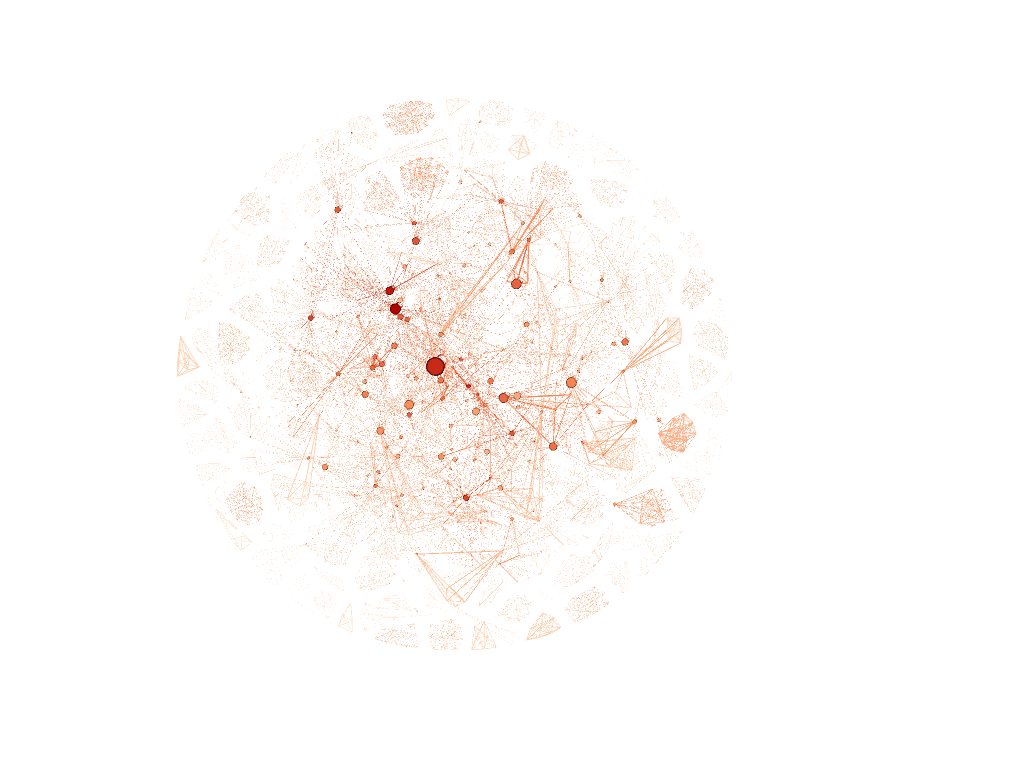

<h4>Grafo de directores (Eigenvector)</h4>
Los puntos de mayor tamaño corresponden a los directores con mayor eigenvector, recordemos que el Top 5 esta integrado por: <br>
-Ramiro Méndez 0.25065407216078167 <br>
-Pedro Barría  0.23335895773610782 <br>
-Jorge Lembeye 0.23335895773610782 <br>
-Nicolas Correa 0.23335895773610782 <br>
-Juan Carlos Balmaceda 0.23335895773610782

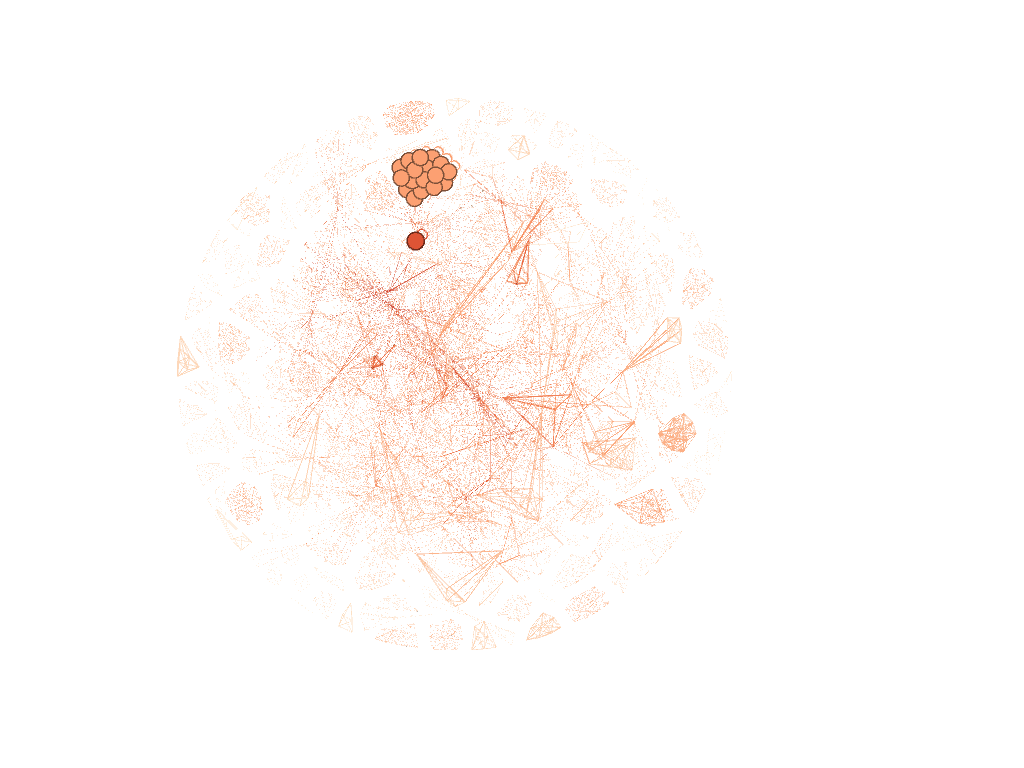